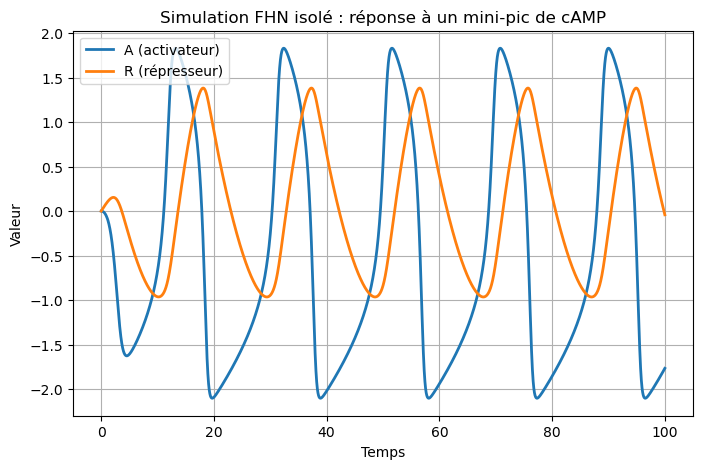

In [57]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Simulation minimale d'un système FitzHugh–Nagumo isolé (une seule cellule) sans diffusion.
L'objectif est de vérifier que l'injection d'un mini-pic de cAMP entraîne une réponse
excitable : A augmente puis retombe, en fonction des paramètres du modèle.

Auteur : Ton Nom
Date   : 2025-02-13
"""

import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Paramètres du modèle FHN
# -------------------------------
a = 0.1         # Intensité du terme de stimulation (dans I_S)
Kd = 5     # Constante de dissociation pour le cAMP
gamma = 0.1    # Facteur de couplage entre A et R
c0 = 0.5        # Terme constant influençant la récupération (R)
epsilon = 0.2   # Facteur d'échelle pour la mise à jour de R
sigma = 0.0     # Amplitude du bruit (optionnel, ici désactivé)

# -------------------------------
# Paramètres de la simulation
# -------------------------------
dt = 0.001       # Pas de temps (en unité de temps)
T_total = 100.0  # Temps total de simulation
n_steps = int(T_total / dt)

# Conditions initiales (tu peux les modifier)
A = 0.0
R = 0.0

# Fonction pour calculer le terme d'excitation I_S à partir du signal de cAMP
def I_S(signal):
    return a * np.log1p(signal / Kd)

# -------------------------------
# Définition du signal de cAMP
# -------------------------------
# On définit un vecteur "signal" qui sera nul partout sauf pendant une courte durée (mini-pic)
signal = np.zeros(n_steps)
t_inject = 1.0         # Temps d'injection (en unités de temps)
inject_duration = 0.1  # Durée de l'injection
inject_start = int(t_inject / dt)
inject_steps = int(inject_duration / dt)
signal[inject_start:inject_start + inject_steps] = 1.0  # Valeur du pic

# -------------------------------
# Stockage des valeurs pour tracer
# -------------------------------
A_vals = np.zeros(n_steps)
R_vals = np.zeros(n_steps)
time_arr = np.linspace(0, T_total, n_steps)

# -------------------------------
# Intégration numérique (méthode d'Euler)
# -------------------------------
for i in range(n_steps):
    A_vals[i] = A
    R_vals[i] = R
    # Calcul du terme d'excitation à partir du signal actuel
    current_I_S = I_S(signal[i])
    # Équations différentielles du modèle FHN
    dA = (A - (A ** 3) / 3 - R + current_I_S) * dt
    dR = epsilon * (A - gamma * R + c0) * dt
    # Ajout éventuellement du bruit (ici sigma = 0 donc pas de bruit)
    # dA += sigma * np.sqrt(dt) * np.random.randn()
    # Mise à jour des états
    A += dA
    R += dR

# -------------------------------
# Tracé des résultats
# -------------------------------
plt.figure(figsize=(8, 5))
plt.plot(time_arr, A_vals, label='A (activateur)', lw=2)
plt.plot(time_arr, R_vals, label='R (répresseur)', lw=2)
plt.xlabel('Temps')
plt.ylabel('Valeur')
plt.title("Simulation FHN isolé : réponse à un mini-pic de cAMP")
plt.legend()
plt.grid(True)
plt.show()

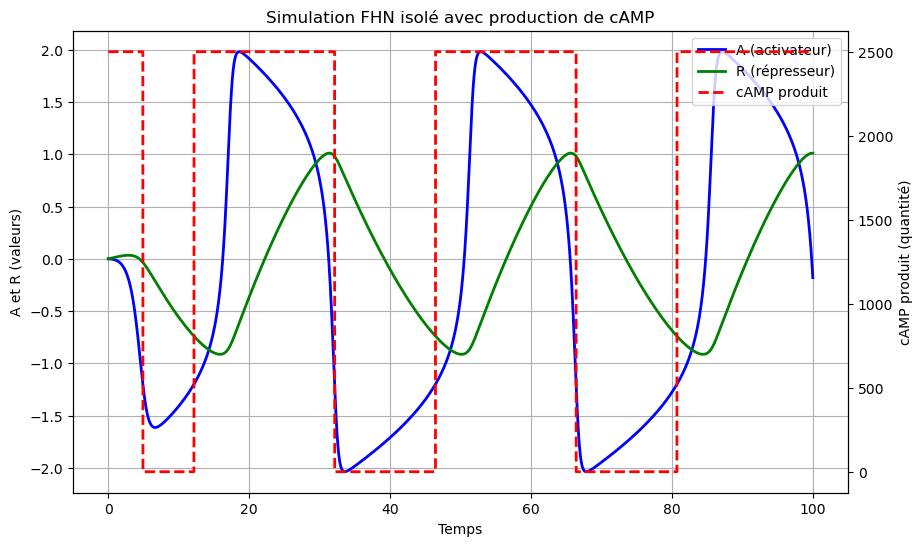

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Paramètres du modèle FHN
# -------------------------------
a = 0.1         # Intensité du terme de stimulation dans I_S
Kd = 5          # Constante de dissociation pour le cAMP
gamma = 0.1     # Facteur de couplage entre A et R
c0 = 0.2        # Terme constant influençant la récupération (R)
epsilon = 0.08   # Facteur d'échelle pour la mise à jour de R
sigma = 0.1     # Amplitude du bruit (désactivé ici)

# -------------------------------
# Paramètres de production de cAMP
# -------------------------------
D = 2500.0      # Quantité de cAMP produite lorsque A dépasse le seuil
af = -1.2        # Seuil d'activation pour la production de cAMP

# -------------------------------
# Paramètres de la simulation
# -------------------------------
dt = 0.001       # Pas de temps
T_total = 100.0  # Temps total de simulation
n_steps = int(T_total / dt)

# Conditions initiales
A = 0.0
R = 0.0

# Fonction pour calculer le terme d'excitation I_S à partir du signal de cAMP externe
def I_S(signal):
    return a * np.log1p(signal / Kd)

# -------------------------------
# Définition du signal externe de cAMP
# -------------------------------
signal = np.zeros(n_steps)
t_inject = 1.0         # Temps d'injection
inject_duration = 0.1  # Durée de l'injection
inject_start = int(t_inject / dt)
inject_steps = int(inject_duration / dt)
signal[inject_start:inject_start + inject_steps] = 1.0  # Injection d'un mini-pic

# -------------------------------
# Stockage des valeurs pour tracer
# -------------------------------
A_vals = np.zeros(n_steps)
R_vals = np.zeros(n_steps)
production_vals = np.zeros(n_steps)  # Pour la production de cAMP
time_arr = np.linspace(0, T_total, n_steps)

# -------------------------------
# Intégration numérique (méthode d'Euler)
# -------------------------------
for i in range(n_steps):
    A_vals[i] = A
    R_vals[i] = R
    # Calcul du terme d'excitation basé sur le signal externe
    current_I_S = I_S(signal[i])
    
    # Équations du modèle FHN
    dA = (A - (A ** 3) / 3 - R + current_I_S) * dt
    dR = epsilon * (A - gamma * R + c0) * dt
    
    # Mise à jour des états
    A += dA
    R += dR
    
    # Calcul de la production de cAMP (on considère que la cellule produit D si A > af)
    production_vals[i] = D if A > af else 0

# -------------------------------
# Tracé avec deux axes y distincts
# -------------------------------
fig, ax1 = plt.subplots(figsize=(10, 6))

# Axe 1 pour A et R
ax1.plot(time_arr, A_vals, label='A (activateur)', color='blue', lw=2)
ax1.plot(time_arr, R_vals, label='R (répresseur)', color='green', lw=2)
ax1.set_xlabel('Temps')
ax1.set_ylabel('A et R (valeurs)')
ax1.grid(True)

# Axe 2 pour la production de cAMP (échelle différente)
ax2 = ax1.twinx()
ax2.plot(time_arr, production_vals, label='cAMP produit', color='red', lw=2, linestyle='--')
ax2.set_ylabel('cAMP produit (quantité)')

# Combinaison des légendes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title("Simulation FHN isolé avec production de cAMP")
plt.show()

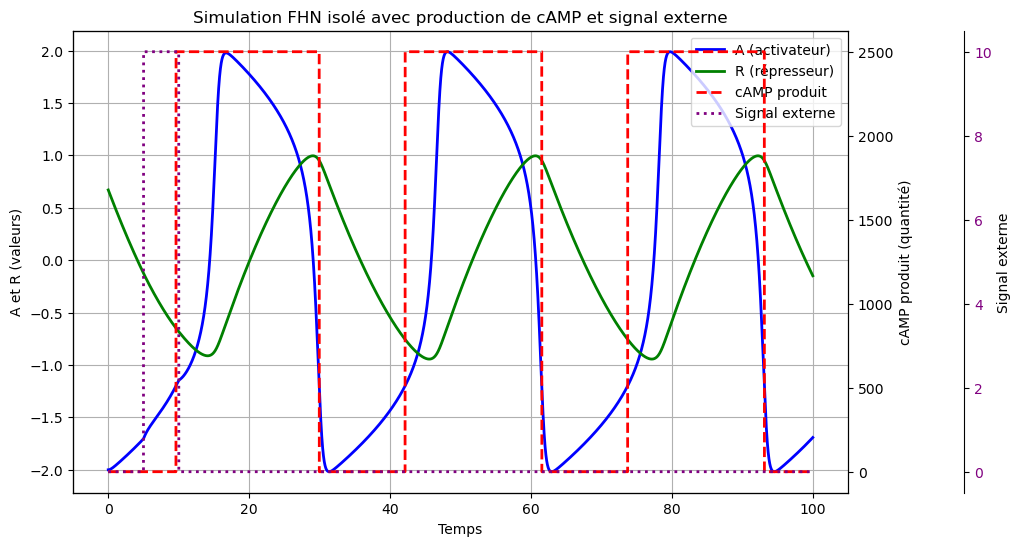

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Paramètres du modèle FHN
# -------------------------------
a = 0.1         # Intensité du terme de stimulation dans I_S
Kd = 5          # Constante de dissociation pour le cAMP
gamma = 0.15     # Facteur de couplage entre A et R
c0 = 0.1       # Terme constant influençant la récupération (R)
epsilon = 0.088   # Facteur d'échelle pour la mise à jour de R
sigma = 0.1     # Amplitude du bruit (désactivé ici)

# -------------------------------
# Paramètres de production de cAMP
# -------------------------------
D = 2500.0      # Quantité de cAMP produite lorsque A dépasse le seuil
af = -1.2        # Seuil d'activation pour la production de cAMP

# -------------------------------
# Paramètres de la simulation
# -------------------------------
dt = 0.001       # Pas de temps
T_total = 100.0  # Temps total de simulation
n_steps = int(T_total / dt)

# Conditions initiales
A = -2
R = 0.67

# Fonction pour calculer le terme d'excitation I_S à partir du signal de cAMP externe
def I_S(signal):
    return a * np.log1p(signal / Kd)

# -------------------------------
# Définition du signal externe de cAMP
# -------------------------------
signal = np.zeros(n_steps)
t_inject = 5.0         # Temps d'injection
inject_duration = 5  # Durée de l'injection
inject_start = int(t_inject / dt)
inject_steps = int(inject_duration / dt)
signal[inject_start:inject_start + inject_steps] = 10.0  # Injection d'un mini-pic

# -------------------------------
# Stockage des valeurs pour tracer
# -------------------------------
A_vals = np.zeros(n_steps)
R_vals = np.zeros(n_steps)
production_vals = np.zeros(n_steps)  # Pour la production de cAMP
time_arr = np.linspace(0, T_total, n_steps)

# -------------------------------
# Intégration numérique (méthode d'Euler)
# -------------------------------
for i in range(n_steps):
    A_vals[i] = A
    R_vals[i] = R
    # Calcul du terme d'excitation basé sur le signal externe
    current_I_S = I_S(signal[i])
    
    # Équations du modèle FHN
    dA = (A - (A ** 3) / 3 - R + current_I_S) * dt
    dR = epsilon * (A - gamma * R + c0) * dt
    
    # Mise à jour des états
    A += dA
    R += dR
    
    # Calcul de la production de cAMP (on considère que la cellule produit D si A > af)
    production_vals[i] = D if A > af else 0

# -------------------------------
# Tracé avec trois axes y distincts
# -------------------------------
fig, ax1 = plt.subplots(figsize=(10, 6))

# Axe 1 pour A et R
ax1.plot(time_arr, A_vals, label='A (activateur)', color='blue', lw=2)
ax1.plot(time_arr, R_vals, label='R (répresseur)', color='green', lw=2)
ax1.set_xlabel('Temps')
ax1.set_ylabel('A et R (valeurs)')
ax1.grid(True)

# Axe 2 pour la production de cAMP
ax2 = ax1.twinx()
ax2.plot(time_arr, production_vals, label='cAMP produit', color='red', lw=2, linestyle='--')
ax2.set_ylabel('cAMP produit (quantité)')

# Axe 3 pour le signal externe
ax3 = ax1.twinx()
# Décaler l'axe 3 vers la droite
ax3.spines["right"].set_position(("axes", 1.15))
ax3.plot(time_arr, signal, label='Signal externe', color='purple', lw=2, linestyle=':')
ax3.set_ylabel('Signal externe')
ax3.tick_params(axis='y', labelcolor='purple')

# Combiner les légendes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper right')

plt.title("Simulation FHN isolé avec production de cAMP et signal externe")
plt.show()

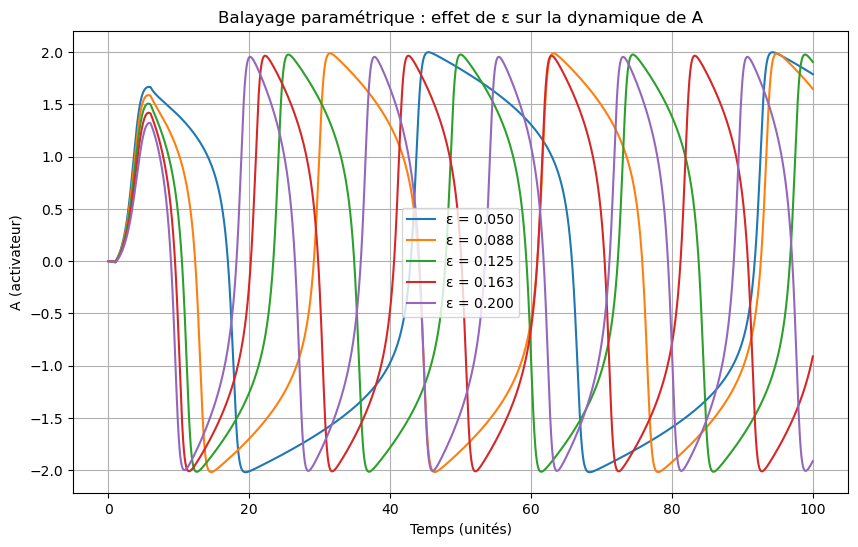

Période moyenne (unités de temps) en fonction de ε :
ε = 0.050 : Période moyenne = 44.251
ε = 0.088 : Période moyenne = 29.744
ε = 0.125 : Période moyenne = 23.304
ε = 0.163 : Période moyenne = 19.379
ε = 0.200 : Période moyenne = 16.978


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# -------------------------------
# Paramètres communs du modèle FHN
# -------------------------------
a = 0.1         # Intensité du terme de stimulation dans I_S
Kd = 5          # Constante de dissociation pour le cAMP
gamma = 0.15    # Facteur de couplage entre A et R
c0 = 0.1        # Terme constant influençant la récupération (R)
sigma = 0.0     # Amplitude du bruit (désactivé ici)

# Paramètres de production de cAMP
D = 2500.0      # Quantité de cAMP produite lorsque A dépasse le seuil
af = 1.2        # Seuil d'activation pour la production de cAMP

# Paramètres du signal externe
t_inject = 1.0         # Temps d'injection
inject_duration = 5    # Durée de l'injection
signal_value = 10.0    # Amplitude du signal externe pendant l'injection

# Paramètres de la simulation
dt = 0.001       # Pas de temps
T_total = 100.0  # Temps total de simulation
n_steps = int(T_total / dt)
time_arr = np.linspace(0, T_total, n_steps)

# Fonction pour calculer le terme d'excitation I_S
def I_S(signal):
    return a * np.log1p(signal / Kd)

# Liste des valeurs de ε à tester (balayage paramétrique)
epsilon_values = np.linspace(0.05, 0.2, 5)
results = {}  # Pour stocker la période moyenne de chaque simulation

plt.figure(figsize=(10, 6))

# Balayage sur ε
for eps in epsilon_values:
    # Réinitialisation des variables d'état pour chaque simulation
    A = 0.0
    R = 0.0
    A_vals = np.zeros(n_steps)
    
    # Définition du signal externe : nul sauf pendant l'injection
    signal = np.zeros(n_steps)
    inject_start = int(t_inject / dt)
    inject_steps = int(inject_duration / dt)
    signal[inject_start:inject_start + inject_steps] = signal_value

    # Intégration numérique par la méthode d'Euler
    for i in range(n_steps):
        A_vals[i] = A
        current_I_S = I_S(signal[i])
        dA = (A - (A**3)/3 - R + current_I_S) * dt
        dR = eps * (A - gamma * R + c0) * dt
        A += dA
        R += dR

    # Détection des pics dans A après l'injection
    peaks, properties = find_peaks(A_vals, height=af)
    if len(peaks) > 1:
        periods = np.diff(time_arr[peaks])
        avg_period = np.mean(periods)
    else:
        avg_period = np.nan  # Si aucun pic ou un seul pic détecté
    results[eps] = avg_period

    # Tracé de la dynamique de A pour la valeur courante de ε
    plt.plot(time_arr, A_vals, label=f'ε = {eps:.3f}')

plt.xlabel('Temps (unités)')
plt.ylabel('A (activateur)')
plt.title('Balayage paramétrique : effet de ε sur la dynamique de A')
plt.legend()
plt.grid(True)
plt.show()

print("Période moyenne (unités de temps) en fonction de ε :")
for eps, period in results.items():
    print(f"ε = {eps:.3f} : Période moyenne = {period:.3f}")

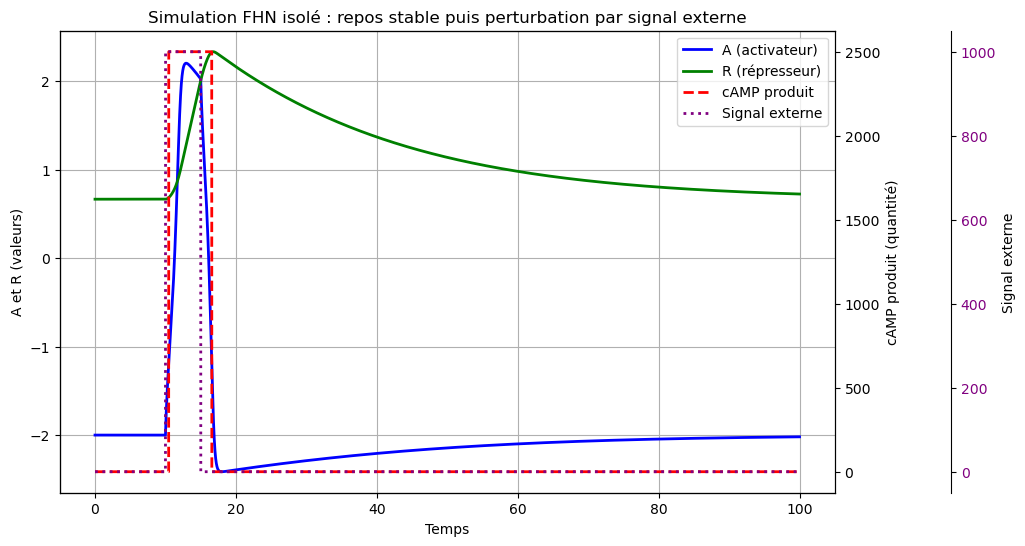

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Paramètres du modèle FHN
# -------------------------------
a = 0.5         # Intensité du terme de stimulation dans I_S (augmentée pour amplifier l'effet)
Kd = 5          # Constante de dissociation pour le cAMP
gamma = 0.15    # Facteur de couplage entre A et R
c0 = 2.1        # Terme constant influençant la récupération (ajusté pour fixer le point de repos)
epsilon = 0.088 # Facteur d'échelle pour la mise à jour de R
sigma = 0.1     # Amplitude du bruit (désactivé ici en pratique)

# -------------------------------
# Paramètres de production de cAMP
# -------------------------------
D = 2500.0      # Quantité de cAMP produite lorsque A dépasse le seuil
af = -1.2       # Seuil d'activation pour la production de cAMP

# -------------------------------
# Paramètres de la simulation
# -------------------------------
dt = 0.001       # Pas de temps
T_total = 100.0  # Temps total de simulation
n_steps = int(T_total / dt)

# Conditions initiales (point fixe de repos)
A = -2.0
R = 0.667

# Fonction pour calculer le terme d'excitation I_S à partir du signal externe de cAMP
def I_S(signal):
    return a * np.log1p(signal / Kd)

# -------------------------------
# Définition du signal externe de cAMP
# -------------------------------
signal = np.zeros(n_steps)
t_inject = 10.0         # Temps d'injection (en minutes, par exemple)
inject_duration = 5     # Durée de l'injection
inject_start = int(t_inject / dt)
inject_steps = int(inject_duration / dt)
signal[inject_start:inject_start + inject_steps] = 1000.0  # Injection d'un mini-pic de cAMP

# -------------------------------
# Stockage des valeurs pour tracer
# -------------------------------
A_vals = np.zeros(n_steps)
R_vals = np.zeros(n_steps)
production_vals = np.zeros(n_steps)  # Production de cAMP
time_arr = np.linspace(0, T_total, n_steps)

# -------------------------------
# Intégration numérique (méthode d'Euler)
# -------------------------------
for i in range(n_steps):
    A_vals[i] = A
    R_vals[i] = R
    current_I_S = I_S(signal[i])
    
    # Équations du modèle FHN
    dA = (A - (A ** 3) / 3 - R + current_I_S) * dt
    dR = epsilon * (A - gamma * R + c0) * dt
    
    # Mise à jour des états
    A += dA
    R += dR
    
    # Production de cAMP : la cellule produit D si A > af
    production_vals[i] = D if A > af else 0

# -------------------------------
# Tracé avec trois axes y distincts
# -------------------------------
fig, ax1 = plt.subplots(figsize=(10, 6))

# Axe 1 pour A et R
ax1.plot(time_arr, A_vals, label='A (activateur)', color='blue', lw=2)
ax1.plot(time_arr, R_vals, label='R (répresseur)', color='green', lw=2)
ax1.set_xlabel('Temps')
ax1.set_ylabel('A et R (valeurs)')
ax1.grid(True)

# Axe 2 pour la production de cAMP
ax2 = ax1.twinx()
ax2.plot(time_arr, production_vals, label='cAMP produit', color='red', lw=2, linestyle='--')
ax2.set_ylabel('cAMP produit (quantité)')

# Axe 3 pour le signal externe
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.15))
ax3.plot(time_arr, signal, label='Signal externe', color='purple', lw=2, linestyle=':')
ax3.set_ylabel('Signal externe')
ax3.tick_params(axis='y', labelcolor='purple')

# Combinaison des légendes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper right')

plt.title("Simulation FHN isolé : repos stable puis perturbation par signal externe")
plt.show()

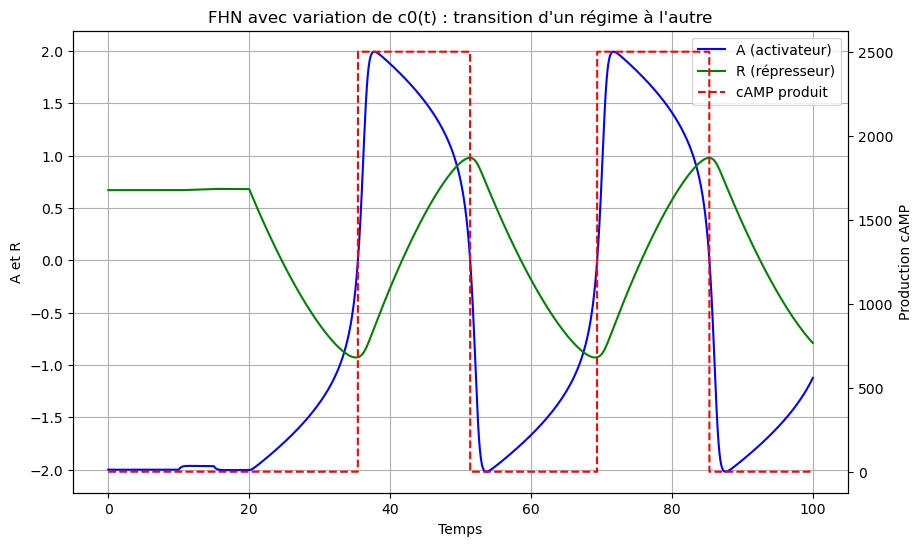

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------------
# Paramètres du modèle FitzHugh–Nagumo (FHN)
# -----------------------------------------------------------------
a = 0.1         # Intensité du terme de stimulation dans I_S
Kd = 5.0        # Constante de dissociation pour le cAMP
gamma = 0.15    # Facteur de couplage entre A et R
epsilon = 0.088  # Facteur d'échelle pour la mise à jour de R
af = 0.0        # Seuil d'activation pour la production de cAMP (exemple)

# On va faire varier c0 au cours du temps
c0_low = 2.1    # Valeur de c0 pour le régime initial (par ex. repos stable)
c0_high = 0.1   # Valeur de c0 pour le second régime (par ex. oscillatoire)
T_switch = 20.0 # Temps (en unités) où on bascule c0_low -> c0_high

# -----------------------------------------------------------------
# Paramètres de production de cAMP
# -----------------------------------------------------------------
D = 2500.0      # Quantité de cAMP produite lorsque A dépasse le seuil af

# -----------------------------------------------------------------
# Paramètres de simulation
# -----------------------------------------------------------------
dt = 0.01        # Pas de temps
T_total = 100.0  # Temps total
n_steps = int(T_total / dt)
time_arr = np.linspace(0, T_total, n_steps)

# -----------------------------------------------------------------
# Conditions initiales
# -----------------------------------------------------------------
A = -2.0
R = 0.67

# -----------------------------------------------------------------
# Définition (optionnelle) d'un signal externe
# -----------------------------------------------------------------
# Par exemple, un pic entre t=10 et t=15
signal = np.zeros(n_steps)
t_inject = 10.0
inject_duration = 5.0
inject_start = int(t_inject / dt)
inject_steps = int(inject_duration / dt)
signal[inject_start:inject_start + inject_steps] = 10.0  # Valeur 10 (ex.)

def I_S(signal_value):
    """
    Terme d'excitation en fonction du signal externe.
    On peut l'ajuster selon la forme souhaitée (ici, log1p).
    """
    return a * np.log1p(signal_value / Kd)

def c0_temps(t):
    """
    Fonction c0(t) : renvoie c0_low si t < T_switch, sinon c0_high.
    On peut aussi faire une transition douce (logistique, linéaire, etc.).
    """
    return c0_low if t < T_switch else c0_high

# -----------------------------------------------------------------
# Stockage des trajectoires
# -----------------------------------------------------------------
A_vals = np.zeros(n_steps)
R_vals = np.zeros(n_steps)
production_vals = np.zeros(n_steps)

# -----------------------------------------------------------------
# Boucle d'intégration (Euler explicite)
# -----------------------------------------------------------------
for i in range(n_steps):
    A_vals[i] = A
    R_vals[i] = R

    # Valeur du signal externe à l'instant courant
    current_signal = signal[i]
    # Calcul du terme d'excitation
    current_I_S = I_S(current_signal)

    # Récupération de c0(t)
    current_c0 = c0_temps(time_arr[i])

    # Equations FHN
    dA = (A - (A**3)/3 - R + current_I_S) * dt
    dR = epsilon * (A - gamma*R + current_c0) * dt

    # Mise à jour
    A += dA
    R += dR

    # Production de cAMP si A > af
    production_vals[i] = D if (A > af) else 0

# -----------------------------------------------------------------
# Tracé
# -----------------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(10, 6))

# A et R
ax1.plot(time_arr, A_vals, label="A (activateur)", color='blue')
ax1.plot(time_arr, R_vals, label="R (répresseur)", color='green')
ax1.set_xlabel("Temps")
ax1.set_ylabel("A et R")
ax1.grid(True)

# Production de cAMP
ax2 = ax1.twinx()
ax2.plot(time_arr, production_vals, label="cAMP produit", color='red', linestyle='--')
ax2.set_ylabel("Production cAMP")

# Légendes combinées
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title("FHN avec variation de c0(t) : transition d'un régime à l'autre")
plt.show()